In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the .csv data file into Data Frame

data = pd.read_csv('/Users/bhargavikallam/Desktop/Assignment-2/Static_dataset.csv')
data.head(10)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
5,16:29.5,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
6,26:58.3,23,3,0,20,0,3.568087,3,3,16,7.000000,pforzheim,pforzheim-bisons,20,1,0
7,57:29.2,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
8,27:59.6,14,3,0,12,0,2.514247,2,3,6,4.000000,face,reface,10,1,0
9,21:27.9,18,0,0,17,0,2.879113,1,2,14,8.500000,store,dellogliostore,15,0,0


### Data Discription:
    To observe the pattern of the data.
    
    Datatype - Most Columns are 'int64' and two columns are 'float64.
    Data     - Even all features are of numericals, two features "longest_word" and "sld" have both numerical and categorical data.

In [3]:
for column in data.columns:
    print("COLUMN NAME = ",column)
    print(data[column].value_counts())
    print("\n-------------------------------------------\n")

COLUMN NAME =  timestamp
49:26.7    46
49:27.5    43
49:27.1    42
49:27.4    39
49:26.9    35
           ..
07:14.4     1
07:37.6     1
42:38.8     1
06:55.0     1
00:40.7     1
Name: timestamp, Length: 35924, dtype: int64

-------------------------------------------

COLUMN NAME =  FQDN_count
24    70912
27    64479
25    23614
26    22065
15     8775
13     7084
14     6976
16     6675
11     6627
12     6511
32     6377
10     5709
17     4712
18     3952
9      3885
19     3221
28     2729
8      2455
20     2178
21     2150
22     1433
7      1419
6      1235
23     1087
2      1008
29      238
5       143
31      130
34       93
4        76
30       53
33       46
36       14
35       13
Name: FQDN_count, dtype: int64

-------------------------------------------

COLUMN NAME =  subdomain_length
7     70251
0     66081
10    65472
8     23266
9     22125
3     17039
11     2616
15      319
4       166
2       155
5       119
6        99
17       98
20       72
12       69
13     

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [5]:
#Data dimentinality

data_org = data.shape
data_org

(268074, 16)

### Feature Engineering:

### Missing Values: 
    A better way to observe and analyze the nan values. 
    
    longest_word = Longest meaningful word over domain length average.
    
    As we can see from 'Value_counts' that this feature have wide range of values, it is decided to delete these rows as '8 rows' accounts for negilible value quantifying total data count.

In [6]:
# checkig for null/missing values

print("IS there NULL Values")
data.isnull().sum()

IS there NULL Values


timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [7]:
# The "longest_word" columns status for nan values
data["longest_word"].loc[data['longest_word'].isna()]

45325     NaN
73336     NaN
105457    NaN
119612    NaN
194276    NaN
207153    NaN
233632    NaN
247640    NaN
Name: longest_word, dtype: object

In [8]:
# Droping the rows with 'NaN' values in column "longest_word"
data.dropna(inplace=True)

In [9]:
#Data dimentinality

data_missingvaluesremoved = data.shape
data_missingvaluesremoved

(268066, 16)

### Duplicate Values 
    More than one record that is exactly the same. Duplication can lead you to make incorrect conclusions by leading you to believe that some observations are more common than they really are.

In [10]:
#Counting duplicate values and deleting them
print("NO of DUPLICATE Values",data.duplicated().sum())

#data=pd.DataFrame.drop_duplicates(data)
print("\nDUPLICATE Values after cleaning",data.duplicated().sum())

NO of DUPLICATE Values 91803

DUPLICATE Values after cleaning 91803


In [11]:
#Data dimentinality

data_deduplicated = data.shape
data_deduplicated

(268066, 16)

### Transforming the Variables:
    timestamp - This feature is in the format of HH-MM-SS. To convert it into numerical data by converting time string into seconds as numericals.
    

In [12]:
#Converting time stamp to numerical feature

def get_sec(time_str,col):
    """Get seconds from time."""
    m, s = time_str[col].split(':')
    
    return float(m) * 60 + float(s)

In [13]:
data['timestamp'] = data.apply(lambda row: get_sec(row, 'timestamp'),axis=1)


In [14]:
data.dtypes

timestamp           float64
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word         object
sld                  object
len                   int64
subdomain             int64
Target Attack         int64
dtype: object

### Hashing Cloumns:
    By applying hash function to columns of dataframe, on ecan create indentifier for the record and has value differs for even slightly different datapoint making it perfect for genearting unique records.
    

In [15]:
data = data.copy()

In [16]:
# Encode our string using UTF-8 default 

data['sld'] = data['sld'].apply(hash).astype("float64")
data['longest_word'] = data['longest_word'].apply(hash).astype("float64")

In [17]:
data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,3379.8,27,10,0,10,11,2.570417,6,6,7,3.666667,-1.597368e+18,-2.968505e+18,14,1,1
1,443.9,27,10,0,10,11,2.767195,6,6,7,3.666667,-1.597368e+18,-2.968505e+18,14,1,1
2,1395.1,26,9,0,10,10,2.742338,6,6,7,3.500000,-1.597368e+18,-2.968505e+18,13,1,0
3,291.9,27,10,0,10,11,2.570417,6,6,7,3.666667,-1.597368e+18,-2.968505e+18,14,1,1
4,764.0,15,9,0,11,0,2.929439,4,3,5,4.333333,-8.202170e+18,-8.202170e+18,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,2031.5,18,3,0,16,0,2.338623,2,3,10,5.333333,6.432356e+18,3.545469e+18,14,1,0
268070,2162.5,27,10,0,10,11,2.767195,6,6,7,3.666667,-1.597368e+18,-2.968505e+18,14,1,0
268071,2241.5,27,10,0,10,11,2.767195,6,6,7,3.666667,-1.597368e+18,-2.968505e+18,14,1,1
268072,1465.1,16,0,0,14,0,3.249687,2,2,13,7.500000,6.273310e+18,5.490592e+15,14,0,0


### Plot Features:

    Firstly handling Numerical features.

In [18]:
data.describe(include='all') 

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
count,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,2.680660e+05,2.680660e+05,268066.000000,268066.000000,268066.00000
mean,1802.871194,22.286948,6.059179,0.845445,10.410048,6.497780,2.485749,4.533675,4.788899,8.252315,4.802258,6.558070e+17,-2.776436e+18,12.576873,0.753512,0.54904
std,1034.030559,6.000943,3.899449,4.942000,3.207761,4.499793,0.407707,2.187641,1.803228,4.415395,4.573132,4.077127e+18,3.894752e+18,4.177785,0.430967,0.49759
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,-9.221306e+18,-9.222875e+18,2.000000,0.000000,0.00000
25%,919.425000,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,-1.597368e+18,-5.904011e+18,11.000000,1.000000,0.00000
50%,1802.300000,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,-1.597368e+18,-2.968505e+18,12.000000,1.000000,1.00000
75%,2687.600000,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,5.093120e+18,-2.968505e+18,14.000000,1.000000,1.00000
max,3599.900000,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,9.222752e+18,9.220983e+18,33.000000,1.000000,1.00000


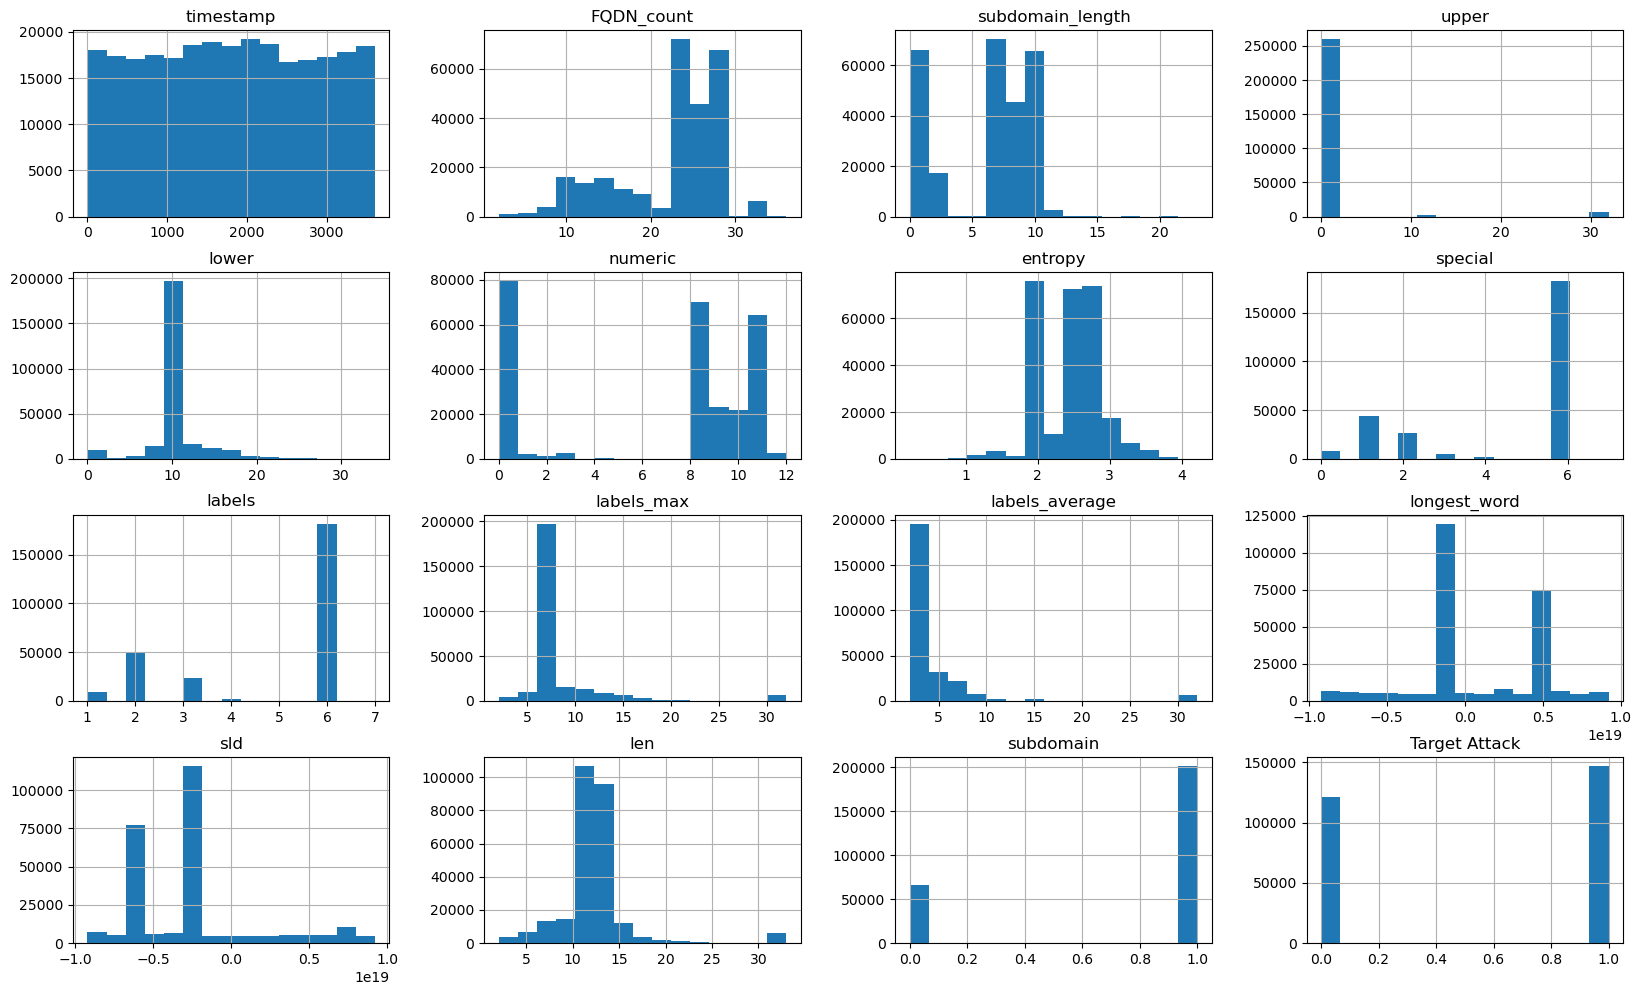

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(bins=15, figsize=(20, 15), layout=(5, 4));

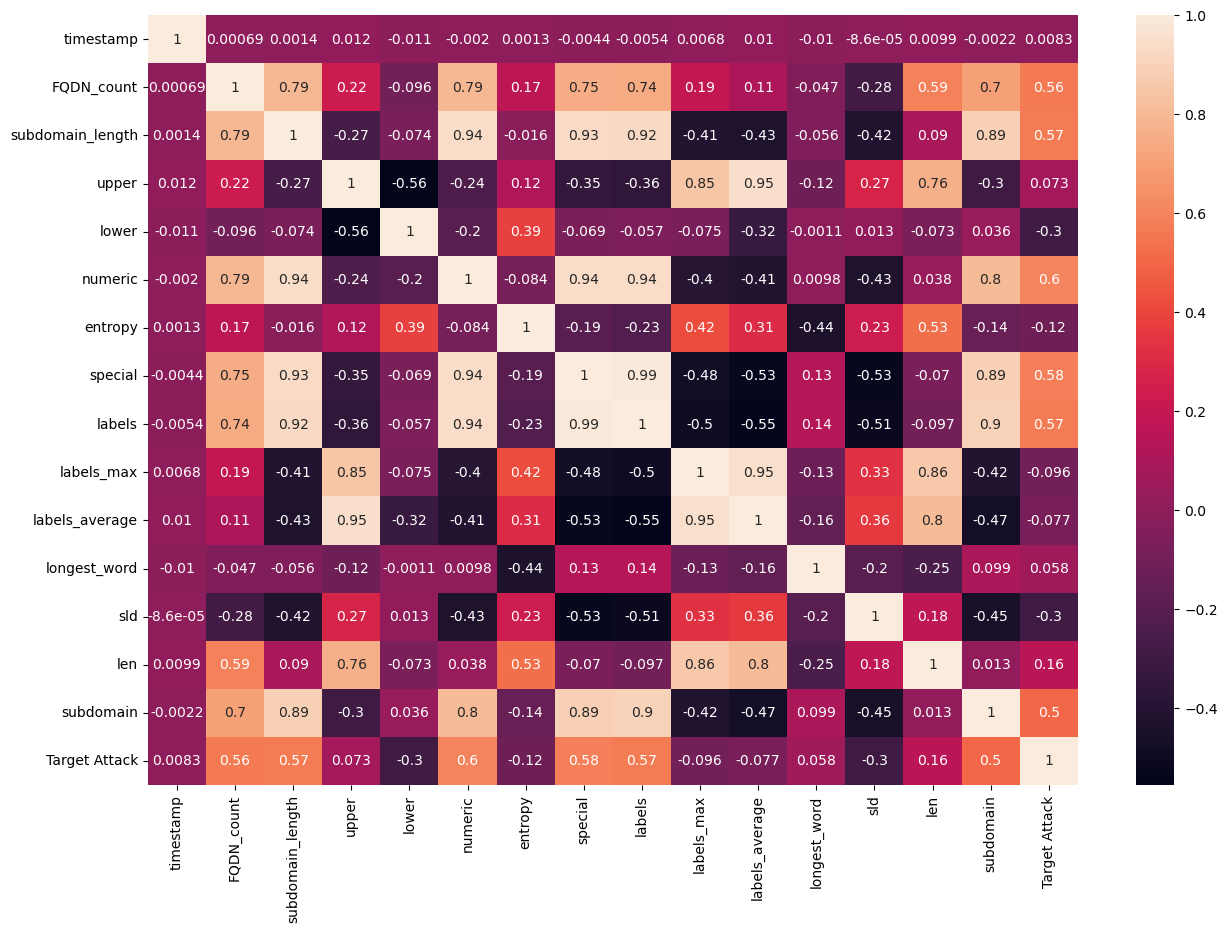

In [20]:
# Data-set high correlations

corrMatrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

##### Let's analyse each feature seperately 

In [21]:
#melt data frame into long format
data_numericals = data.drop(['timestamp', 'longest_word','sld'], axis = 1) 
data_melted = pd.melt(data_numericals)

<AxesSubplot:xlabel='variable', ylabel='value'>

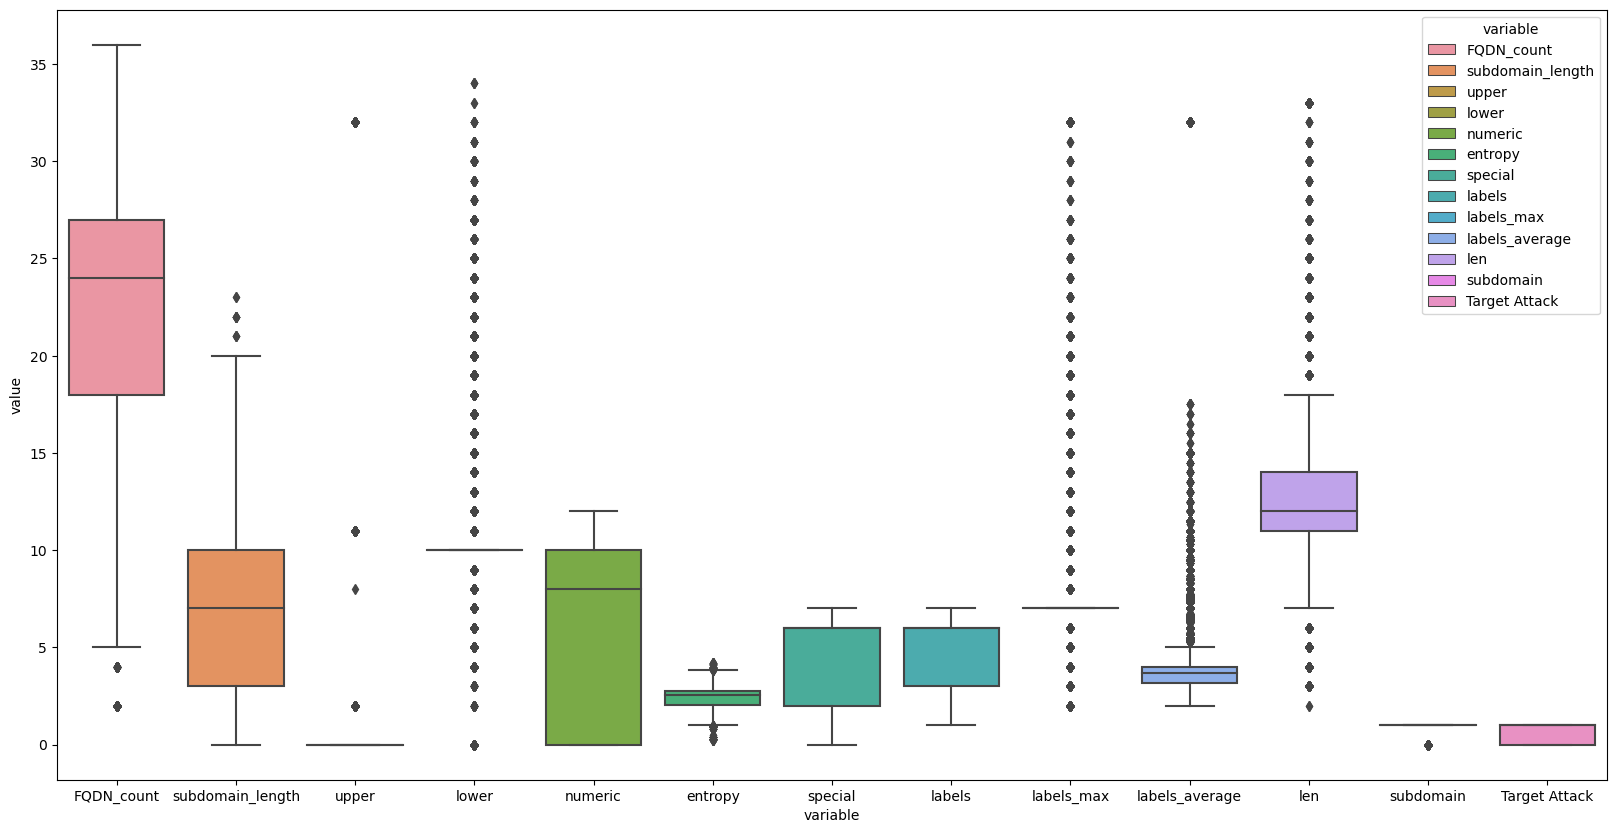

In [22]:
#create seaborn boxplots by group

plt.figure(figsize=(20,10))

sns.boxplot( data=data_melted, x='variable', y='value', orient='v', hue="variable", dodge=False)

##### As depicted in the above boxplot Features with outliers are following:
    
    'upper'
    'lower'
    'entropy'
    'labels_max'
    'labels_average'
    'len'

147179 of 268066 No of Attacks and it is the 54.90% of the training set.
120887 of 268066  No of Non-Attacks and it is the 45.10% of the training set.


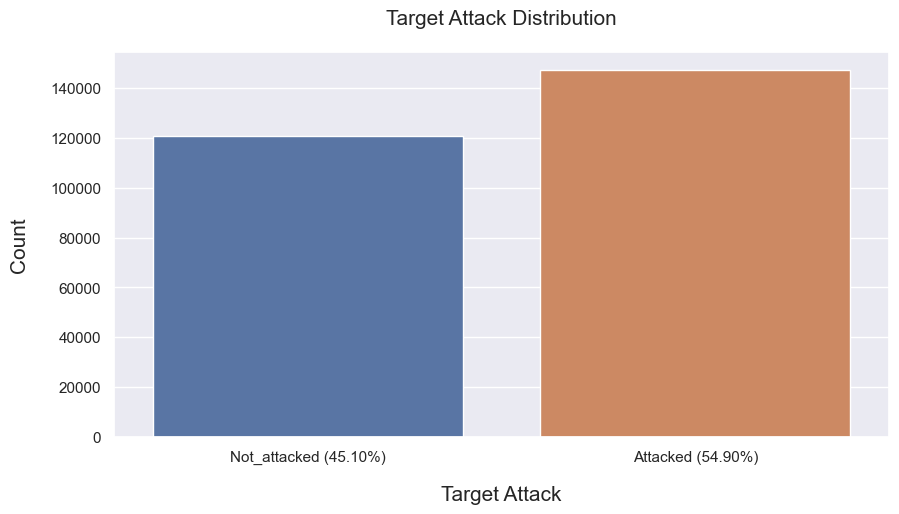

In [23]:
# Plotting the distribution of target variable

sns.set(style="darkgrid")

attacked = data['Target Attack'].value_counts()[1]
Not_attacked = data['Target Attack'].value_counts()[0]
attacked_per = attacked / data.shape[0] * 100
Not_attacked_per = Not_attacked / data.shape[0] * 100

print('{} of {} No of Attacks and it is the {:.2f}% of the training set.'.format(attacked, data.shape[0], attacked_per))
print('{} of {}  No of Non-Attacks and it is the {:.2f}% of the training set.'.format(Not_attacked, data.shape[0], Not_attacked_per))

plt.figure(figsize=(10, 5))
sns.countplot(data['Target Attack'])


plt.xlabel('Target Attack', size=15, labelpad=15)
plt.ylabel('Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not_attacked ({0:.2f}%)'.format(Not_attacked_per), 'Attacked ({0:.2f}%)'.format(attacked_per)])

plt.title('Target Attack Distribution', size=15, y=1.05)

plt.show()

### Feature-Target Relationships:
    visualize the distribution of attributes for data instances for each class.The data is grouped by the class attribute (two groups) then a matrix of histograms is created for the attributes is in each group.

In [24]:
# Features that seeemed skwed in boxplot 

#data_numericals = data_numericals.drop(['FQDN_count','subdomain_length','numeric','special','labels','subdomain','Target Attack'],axis=1)

Features_numericals = data_numericals.columns.values

In [25]:
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        
        # Determine a list of indices of outliers for feature col
        outlier_list = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )]
        
        outlier_list_col = outlier_list.index
    
        if(outlier_list.empty == False):
            print("\nColumn Name = ", col)
            print("No of upper outliers = " ,df[col][df[col] > Q3 + outlier_step].count())
            print("No of lower outliers = " ,df[col][df[col] < Q1 - outlier_step].count())

        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Features
Outliers = detect_outliers(data_numericals,2,Features_numericals)


Column Name =  FQDN_count
No of upper outliers =  0
No of lower outliers =  1084

Column Name =  subdomain_length
No of upper outliers =  14
No of lower outliers =  0

Column Name =  upper
No of upper outliers =  9315
No of lower outliers =  0

Column Name =  lower
No of upper outliers =  51830
No of lower outliers =  26955

Column Name =  entropy
No of upper outliers =  60
No of lower outliers =  104

Column Name =  labels_max
No of upper outliers =  56043
No of lower outliers =  21907

Column Name =  labels_average
No of upper outliers =  48373
No of lower outliers =  0

Column Name =  len
No of upper outliers =  10631
No of lower outliers =  10634

Column Name =  subdomain
No of upper outliers =  0
No of lower outliers =  66075


Target Attack
0    [[AxesSubplot(0.125,0.755806;0.158163x0.124194...
1    [[AxesSubplot(0.125,0.755806;0.158163x0.124194...
dtype: object

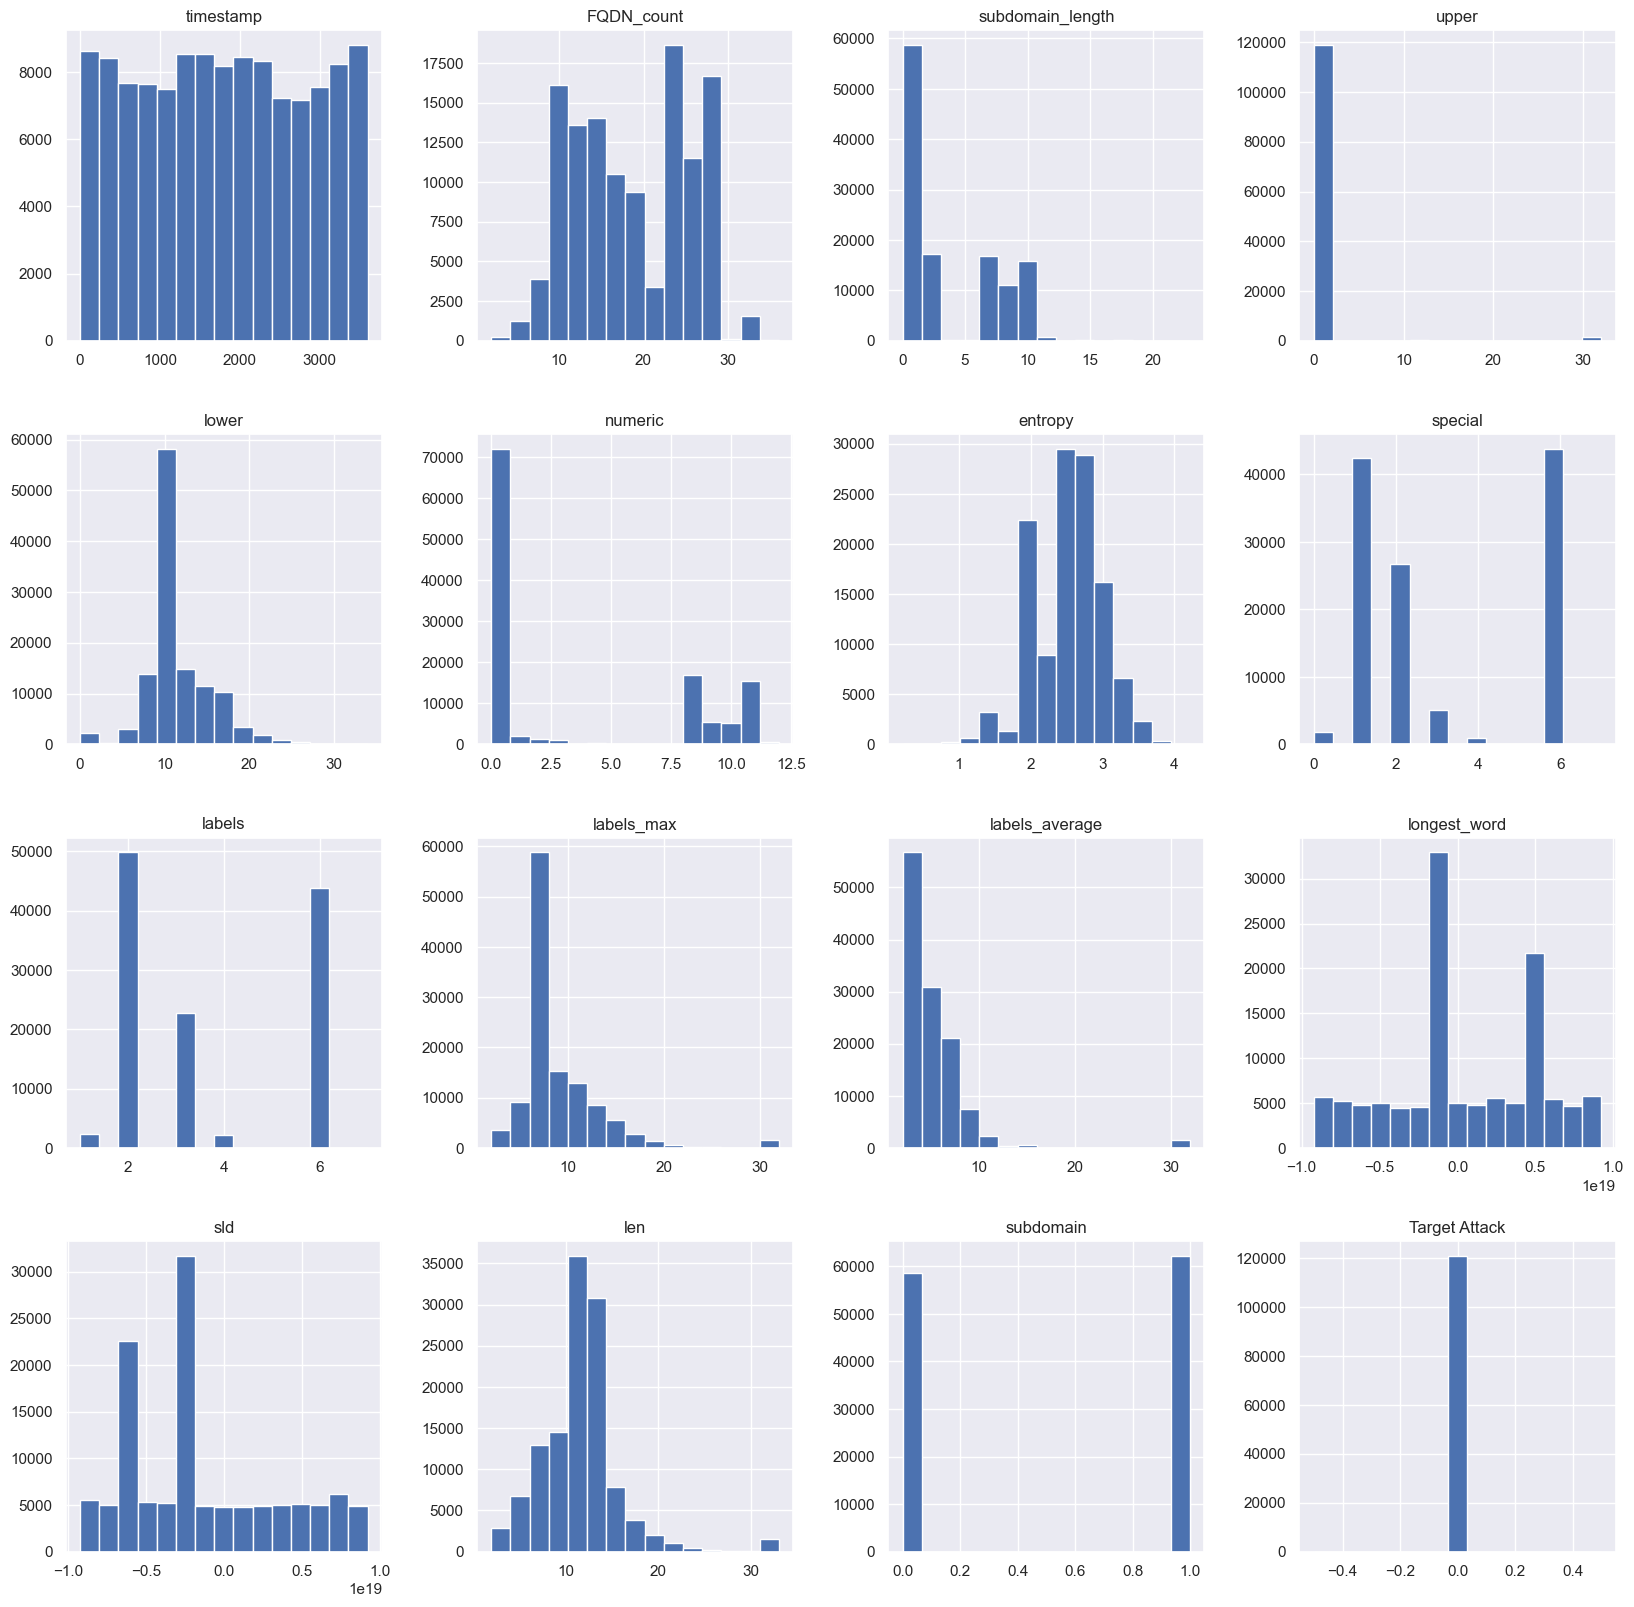

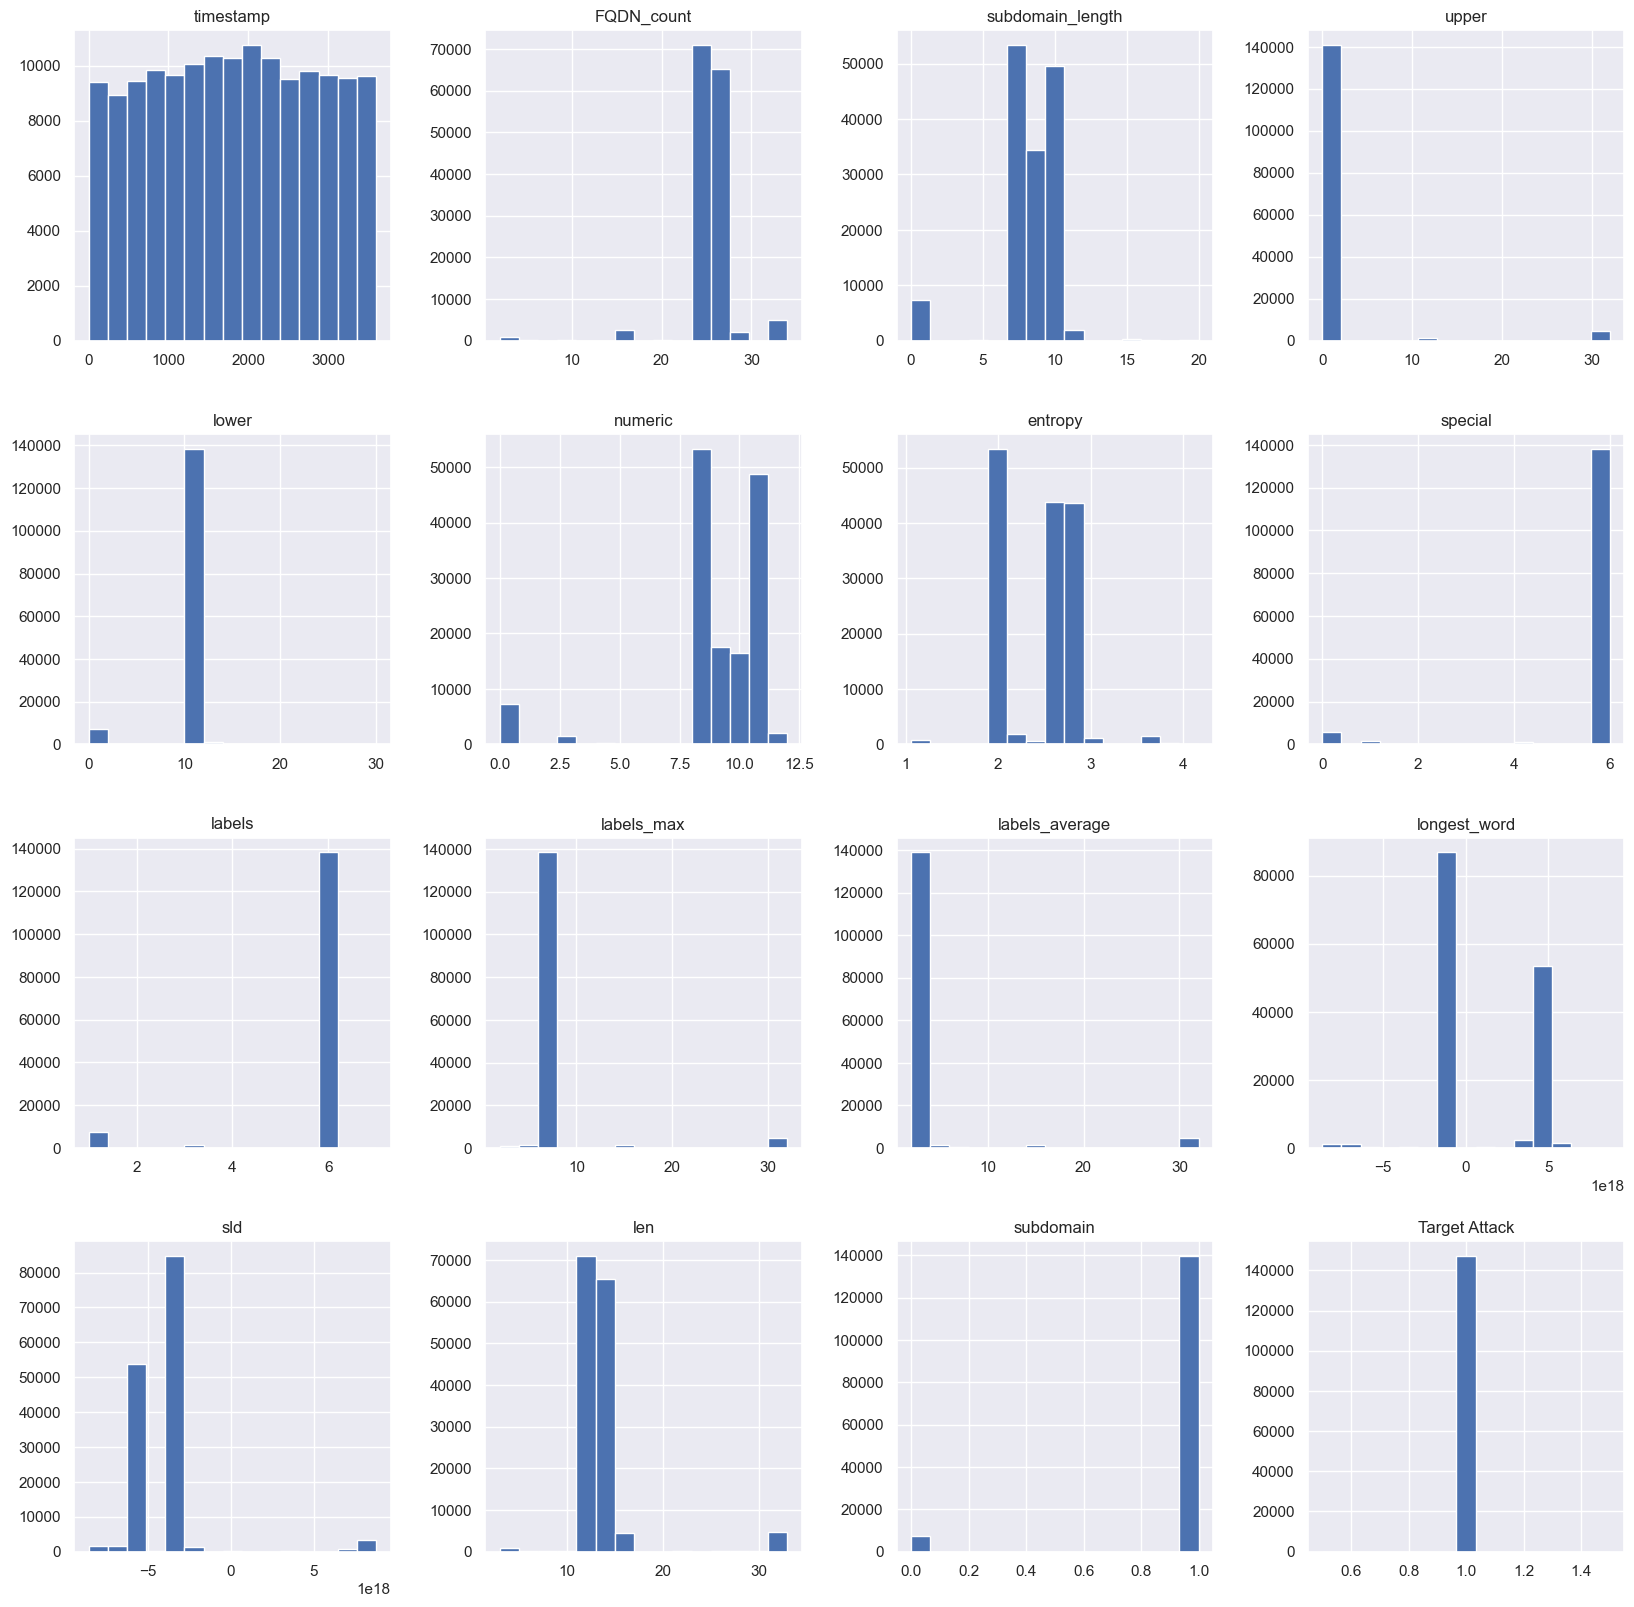

In [26]:
data.groupby('Target Attack').hist(bins=15, figsize=(20, 25), layout=(5, 4))


### Feature Selection:

In [27]:
# Declare feature vector and target variable

X = data.drop(['Target Attack'], axis = 1)
y = data['Target Attack']

In [28]:
# Extracting selected features names

features = np.array(X.columns)

def Features_selected(selection):
    
    Features_sel = []
    
    for i in range(len(selection)):
        if selection[i] == True:
            Features_sel.append(features[i])
        else:
            Features_sel.append('-')
    return Features_sel
        


In [29]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 0)

<AxesSubplot:>

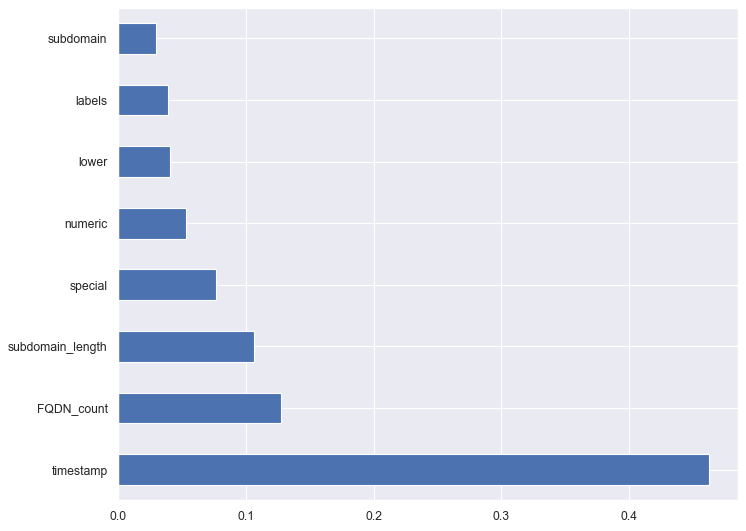

In [30]:
# instantiate the classifier with n_estimators = 100'

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0,class_weight= 'balanced', n_jobs=-1)

# fit the classifier to the training set

clf.fit(X_train, y_train)

# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(8).plot(kind='barh')

In [31]:
Features_Rf = list(feat_importances.nlargest(8).index)

In [32]:
selection_rf = []

for i in range(len(X.columns)):
    if feat_importances[i] > 0.029:
        selection_rf.append(True)
    else:
        selection_rf.append(False)
        
Features_RF = Features_selected(selection_rf)

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier


sel_rfe_gb=RFE(GradientBoostingClassifier(n_estimators=100, random_state=1), n_features_to_select=8)
sel_rfe_gb.fit(X_train, y_train)


RFE(estimator=GradientBoostingClassifier(random_state=1),
    n_features_to_select=8)

In [34]:
# Total features selected:

selection_rfe = sel_rfe_gb.get_support()
        
Features_Rfe = Features_selected(selection_rfe)

In [35]:
# RFECV finds finds the best number of features to keep using Lasso

from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso

# Init the estimator
rfecv = RFECV(
    estimator=Lasso(),
    cv=3,
    scoring="r2",
    min_features_to_select=8
)

# fit the classifier to the training set

rfecv = rfecv.fit(X_train, y_train)

In [36]:
# Total features selected:

selection_rfecv = rfecv.support_
        
Features_rfecv = Features_selected(selection_rfecv)

In [37]:
# Combining the votes with boolean values of selection

votes = np.sum([selection_rfe,selection_rfecv], axis=0)

# as numpy dosen't work on list for loop is used to add the votes for random forest

for i in range(len(selection_rf)):

    if selection_rf[i] == True:
        votes[i] = votes[i]+1
        
        
max_votes = votes > 1
Final_Freatures =  Features_selected(max_votes)
max_votes

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True, False, False,  True, False,  True])

In [38]:
# dictionary of lists 
dict = {'Features_RF': Features_RF, 'Features_Rfe': Features_Rfe,'Features_rfecv':Features_rfecv,'votes' : votes, 'Final_Freatures' : Final_Freatures} 
    
df_feature_selection = pd.DataFrame(dict)
    
df_feature_selection

,Features_RF,Features_Rfe,Features_rfecv,votes,Final_Freatures
0,timestamp,timestamp,timestamp,3,timestamp
1,FQDN_count,FQDN_count,FQDN_count,3,FQDN_count
2,subdomain_length,subdomain_length,-,2,subdomain_length
3,-,-,-,0,-
4,lower,lower,-,2,lower
5,numeric,-,-,1,-
6,-,-,-,0,-
7,special,special,-,2,special
8,labels,labels,-,2,labels
9,-,labels_max,labels_max,2,labels_max


In [39]:
F_Freatures = [e for e in Final_Freatures if e not in ('-')]


list(F_Freatures)

# Extracting the dataset with only columns from Feature selection output

final_data = X_train[F_Freatures]

In [40]:
final_data

,timestamp,FQDN_count,subdomain_length,lower,special,labels,labels_max,sld,subdomain
142269,788.2,24,7,10,6,6,7,-5.904011e+18,1
168315,2330.7,14,3,12,2,3,6,7.199597e+18,1
2394,60.4,25,8,10,6,6,7,-2.968505e+18,1
32770,809.2,16,0,15,1,2,12,7.554238e+18,0
186653,520.2,36,0,22,3,2,32,-8.151365e+18,0
...,...,...,...,...,...,...,...,...,...
58662,3462.3,24,7,10,6,6,7,-5.904011e+18,1
196614,995.7,9,0,8,1,2,5,-7.881805e+18,0
183805,49.6,24,7,10,6,6,7,-5.904011e+18,1
72959,1450.0,12,0,11,1,2,9,-1.022171e+18,0


In [41]:
#pickle the dataframe for later use

final_data.to_pickle("./final_data.pkl")

### Model Training:

        Train-test split is already done during feature selection to prevent data leakage. We gonna use same split here.

In [42]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler



X_train_updated = X_train[F_Freatures]
X_test_updated = X_test[F_Freatures]


sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_updated)
X_test_scaled = sc.fit_transform(X_test_updated)
X_train_scaled


array([[-0.98054691,  0.28683097,  0.24257595, ..., -0.28399049,
        -0.8037067 ,  0.57259036],
       [ 0.51108846, -1.37932491, -0.78297157, ..., -0.51077848,
         2.56054354,  0.57259036],
       [-1.68434738,  0.45344656,  0.49896283, ..., -0.28399049,
        -0.05003819,  0.57259036],
       ...,
       [-1.69479124,  0.28683097,  0.24257595, ..., -0.28399049,
        -0.8037067 ,  0.57259036],
       [-0.34057006, -1.71255609, -1.55213221, ...,  0.1695855 ,
         0.44966821, -1.74644925],
       [-1.72022399,  0.28683097,  0.24257595, ..., -0.28399049,
        -0.8037067 ,  0.57259036]])

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def metrics(clf):
    
    results = []
    
    #predictions
    predicted = clf.predict(X_test_scaled)
    

    
    #classification report
    report = classification_report(y_test, predicted)
    print(report)
    
    #Acccuracy score
    results.append(accuracy_score(y_test, predicted))
    
    # Weighted f1-score - to contain imbalance
    results.append(f1_score(y_test, predicted, average='weighted'))
    
    #precision weignted
    results.append(precision_score(y_test, predicted, average='weighted'))
    
    #recall weignted
    results.append(recall_score(y_test, predicted, average='weighted'))
    
    return results
    

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discrimant Analysis (Default parameters)
clf_lda = LinearDiscriminantAnalysis()

clf_lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [45]:
results_lda = metrics(clf_lda)

              precision    recall  f1-score   support

           0       0.98      0.61      0.75     24178
           1       0.76      0.99      0.86     29436

    accuracy                           0.82     53614
   macro avg       0.87      0.80      0.80     53614
weighted avg       0.86      0.82      0.81     53614



In [46]:
from sklearn.neural_network import MLPClassifier

# Neural Networks multi-layer perceptron (MLP) algorithm
clf_NN = MLPClassifier(solver='adam', activation='relu', alpha=0.001,shuffle =True, hidden_layer_sizes=(500,), random_state=0, max_iter=1000)
    
clf_NN.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(500,), max_iter=1000,
              random_state=0)

In [47]:
results_NN = metrics(clf_NN)

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     24178
           1       0.76      1.00      0.86     29436

    accuracy                           0.82     53614
   macro avg       0.88      0.80      0.81     53614
weighted avg       0.87      0.82      0.81     53614



In [48]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with linear solver
clf_lr = LogisticRegression(solver='liblinear')

clf_lr.fit( X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [49]:
results_lr = metrics(clf_lr)

              precision    recall  f1-score   support

           0       0.98      0.61      0.75     24178
           1       0.76      0.99      0.86     29436

    accuracy                           0.82     53614
   macro avg       0.87      0.80      0.80     53614
weighted avg       0.86      0.82      0.81     53614



### Model Evaluation:

In [50]:
#creating results table for better comparision

data = {'LinearDiscriminantAnalysis': results_lda, 'MLPClassifier': results_NN, 'LogisticRegression': results_lr}
  
results=pd.DataFrame(data, index=['accuracy','f1-score','precision','recall'])

results

,LinearDiscriminantAnalysis,MLPClassifier,LogisticRegression
accuracy,0.818760,0.822490,0.818648
f1-score,0.809840,0.813203,0.809712
precision,0.857017,0.865111,0.856949
recall,0.818760,0.822490,0.818648


### Save Model

In [51]:
#choosing MLPClassifier
import pickle

pickle.dump(clf_NN, open('model_NN.pkl', 'wb'))

pickle.dump(F_Freatures, open('features_selected.pkl', 'wb'))
